In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data-export (1) (1).csv')
df.shape

(3183, 10)

In [ ]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 10 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   # ----------------------------------------  3183 non-null   object
 1   Unnamed: 1                                  3183 non-null   object
 2   Unnamed: 2                                  3183 non-null   object
 3   Unnamed: 3                                  3183 non-null   object
 4   Unnamed: 4                                  3183 non-null   object
 5   Unnamed: 5                                  3183 non-null   object
 6   Unnamed: 6                                  3183 non-null   object
 7   Unnamed: 7                                  3183 non-null   object
 8   Unnamed: 8                                  3183 non-null   object
 9   Unnamed: 9                                  3183 non-null   object
dtypes: object(10)
memory usa

In [ ]:
df.describe()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,3183,3183,3183,3183,3183,3183,3183,3183,3183,3183
unique,8,673,148,181,104,2824,809,2026,987,679
top,Direct,2024042515,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


In [ ]:
df.columns=df.iloc[0]
df=df.drop(index=0).reset_index(drop=True)
df.columns=["channel group", "DateHour", "Users", "Sessions", "Engaged Session", "Average engagement time per session", "Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Session                      3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [ ]:
df['DateHour']=pd.to_datetime(df['DateHour'],format="%Y%m%d%H",errors='coerce')

In [ ]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour
df.head()

,channel group,DateHour,Users,Sessions,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [ ]:
df.describe()

,DateHour,Users,Sessions,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [ ]:
sns.set(style="whitegrid")

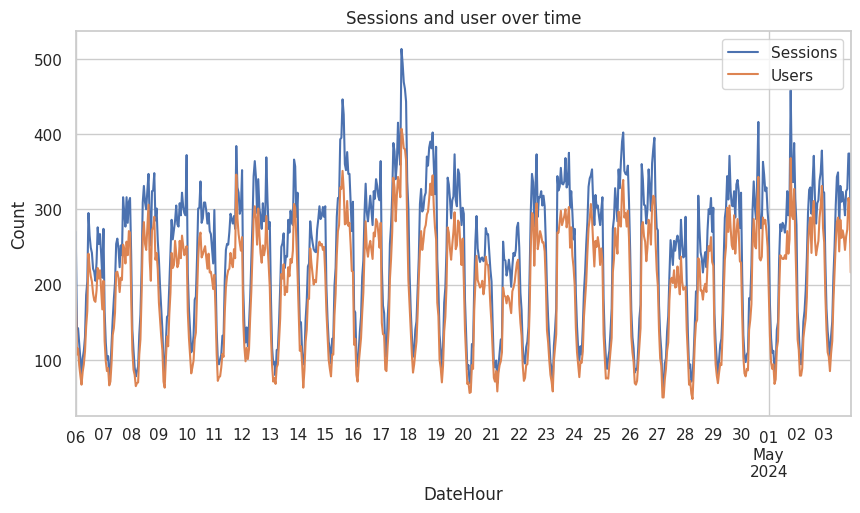

In [ ]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[['Sessions','Users']].sum().plot(ax=plt.gca())
plt.title("Sessions and user over time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2691658921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")


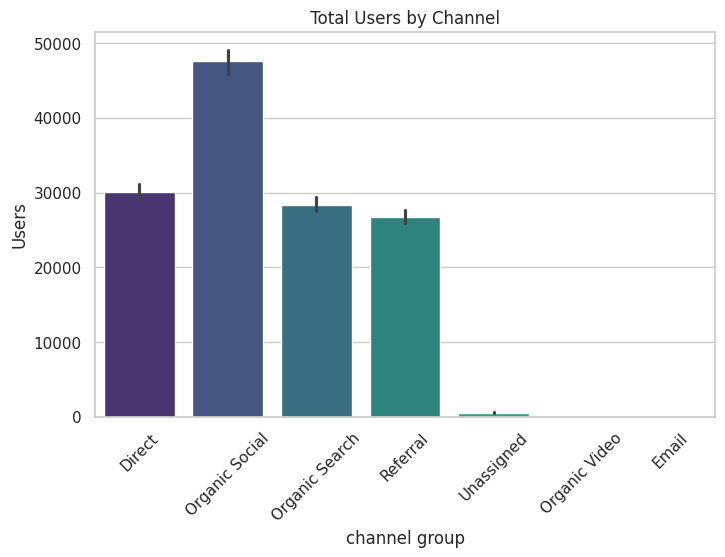

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title(" Total Users by Channel ")
plt.xticks (rotation=45)
plt.show()

/tmp/ipython-input-2767305459.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engagement_time_by_channel.index, y=avg_engagement_time_by_channel.values, palette='coolwarm')


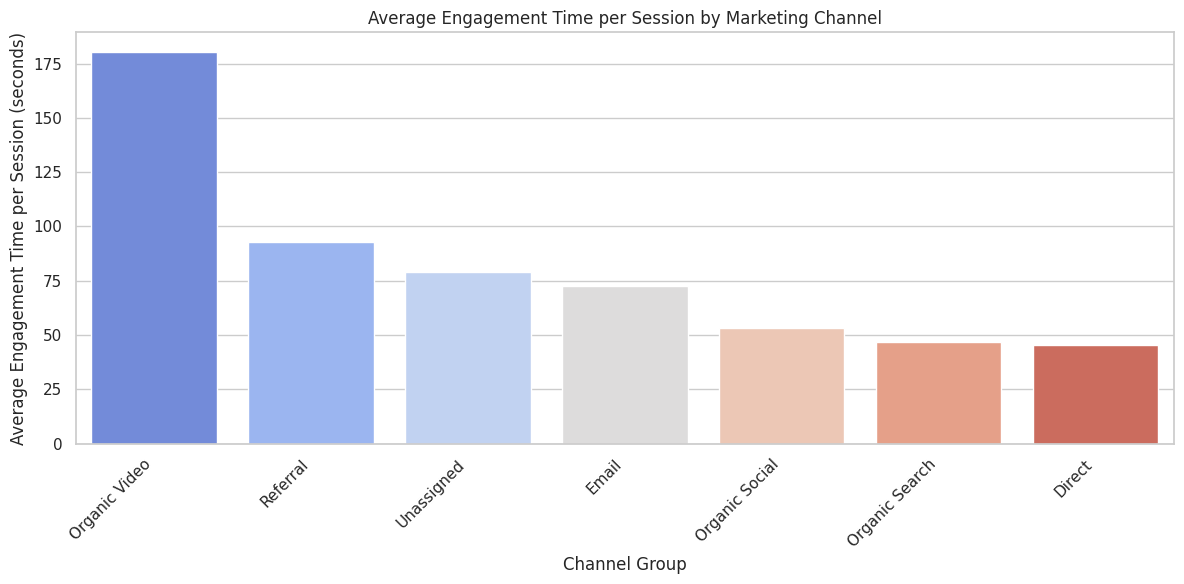

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_engagement_time_by_channel.index, y=avg_engagement_time_by_channel.values, palette='coolwarm')
plt.title('Average Engagement Time per Session by Marketing Channel')
plt.xlabel('Channel Group')
plt.ylabel('Average Engagement Time per Session (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-189865618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engagement_rate_by_channel.index, y=avg_engagement_rate_by_channel.values, palette='viridis')


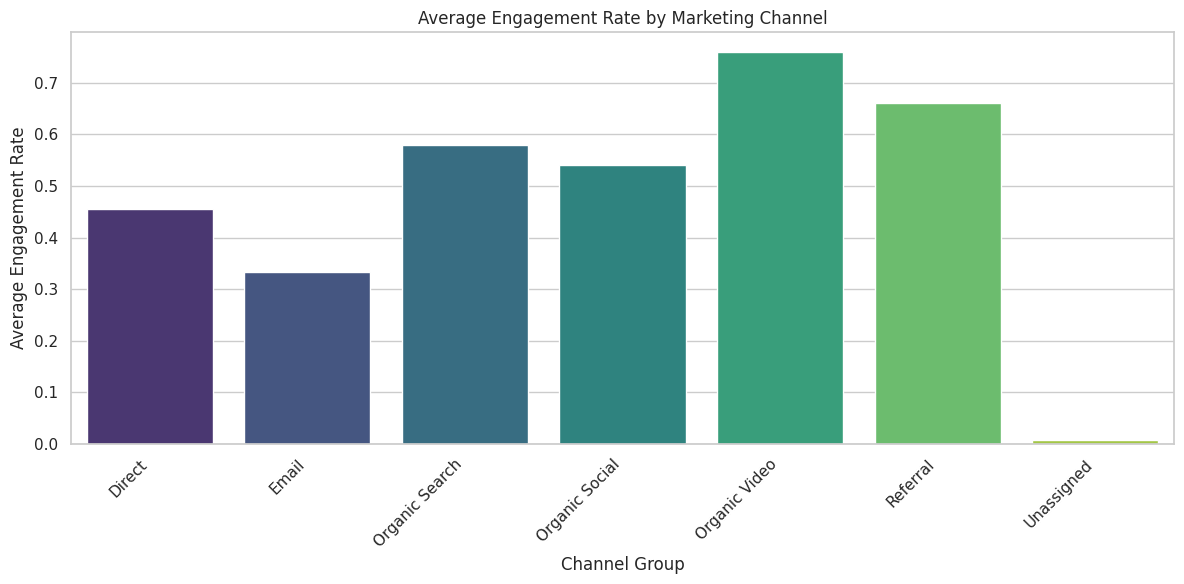

In [ ]:
avg_engagement_rate_by_channel = df.groupby('channel group')['Engagement rate'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_engagement_rate_by_channel.index, y=avg_engagement_rate_by_channel.values, palette='viridis')
plt.title('Average Engagement Rate by Marketing Channel')
plt.xlabel('Channel Group')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

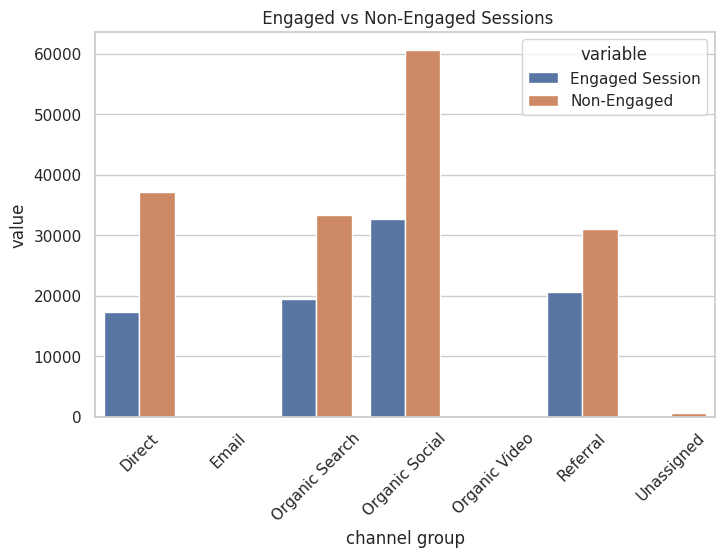

In [ ]:
session_df = df.groupby("channel group") [["Sessions", "Engaged Session"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"]
session_df["Engaged Session"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged Session", "Non-Engaged"], var_name="variable", value_name="value")
plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title(" Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

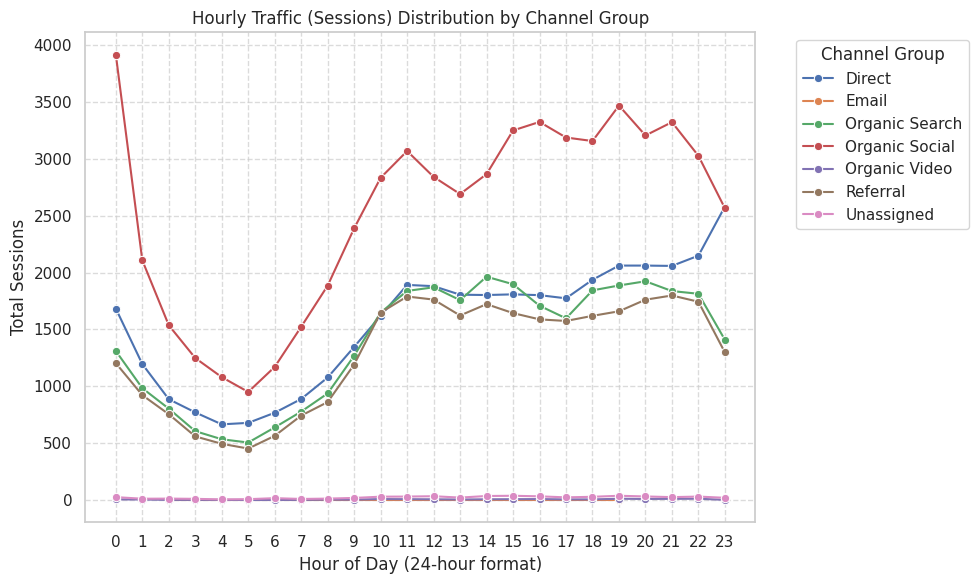

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_traffic, x='Hour', y='Sessions', hue='channel group', marker='o')
plt.title('Hourly Traffic (Sessions) Distribution by Channel Group')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Total Sessions')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Channel Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

,DateHour,Sessions,Engagement rate
0,2024-04-06 00:00:00,270,0.450262
1,2024-04-06 01:00:00,142,0.489905
2,2024-04-06 02:00:00,142,0.595759
3,2024-04-06 03:00:00,122,0.446725
4,2024-04-06 04:00:00,102,0.494964


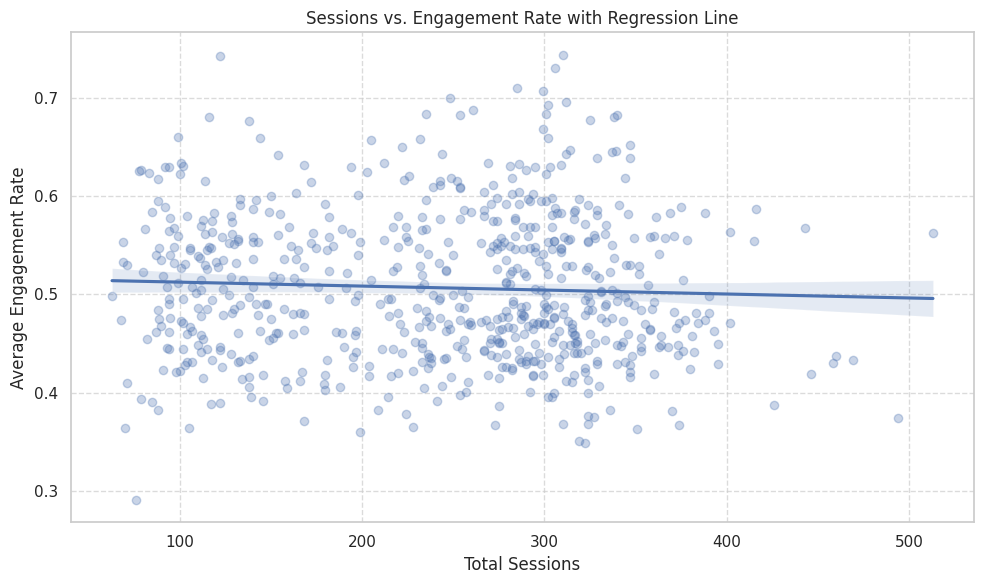

In [ ]:
df_aggregated = df.groupby('DateHour').agg({
    'Sessions': 'sum',
    'Engagement rate': 'mean'
}).reset_index()
display(df_aggregated.head())
plt.figure(figsize=(10, 6))
sns.regplot(data=df_aggregated, x='Sessions', y='Engagement rate', scatter_kws={'alpha':0.3})
plt.title('Sessions vs. Engagement Rate with Regression Line')
plt.xlabel('Total Sessions')
plt.ylabel('Average Engagement Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1146174130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")


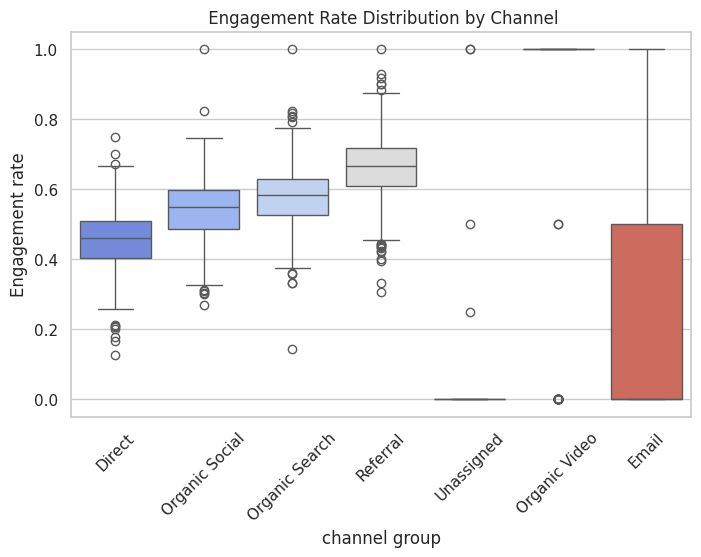

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", palette="coolwarm")
plt.title(" Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()